<a href="https://colab.research.google.com/github/SvicideRyde/Testing/blob/main/Handling_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = pd.read_csv('customer_shopping_data.csv')

In [17]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


<ipython-input-18-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

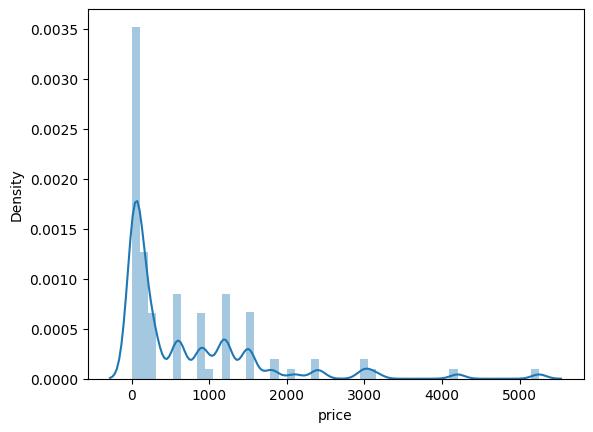

In [18]:
sns.distplot(data['price'])

<Axes: ylabel='price'>

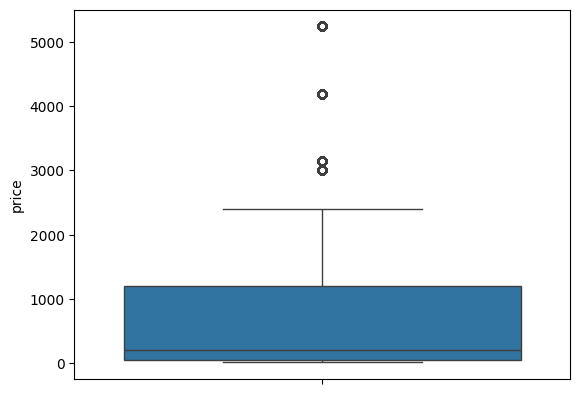

In [19]:
sns.boxplot(data['price'])

**Z SCORE METHOD**

In [20]:
#Find the limits
top = data['price'].mean() + 3*data['price'].std()
bot = data['price'].mean() - 3*data['price'].std()
print('Top Limit:', top)
print('Bottom Limit:', bot)

Top Limit: 3512.810022569011
Bottom Limit: -2134.297380723792


In [21]:
#define the outliers
data.loc[(data['price']> top) | (data['price'] < bot) ]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
23,I252275,C313348,Male,44,Technology,5,5250.0,Cash,26/10/2021,Kanyon
53,I160777,C626042,Female,43,Technology,4,4200.0,Cash,22/02/2022,Metrocity
69,I883721,C236859,Female,44,Technology,5,5250.0,Credit Card,19/11/2021,Mall of Istanbul
363,I194017,C462011,Female,67,Technology,5,5250.0,Cash,3/1/2022,Kanyon
391,I252528,C333065,Male,47,Technology,5,5250.0,Debit Card,4/10/2022,Cevahir AVM
...,...,...,...,...,...,...,...,...,...,...
99204,I264904,C285285,Female,21,Technology,4,4200.0,Credit Card,6/12/2021,Forum Istanbul
99224,I378781,C324387,Female,27,Technology,5,5250.0,Credit Card,10/3/2022,Mall of Istanbul
99234,I316025,C288067,Female,21,Technology,4,4200.0,Cash,23/06/2021,Mall of Istanbul
99242,I115261,C544895,Female,40,Technology,4,4200.0,Cash,10/7/2022,Istinye Park


In [23]:
#Trimming the outliers
new_data= data.loc[(data['price']< top) & (data['price'] > bot) ]
print('Before Trimming:', len(data))
print('After Trimming:', len(new_data))
print('Outliers that removed:', len(data)-len(new_data))

Before Trimming: 99457
After Trimming: 97455
Outliers that removed: 2002


<Axes: ylabel='price'>

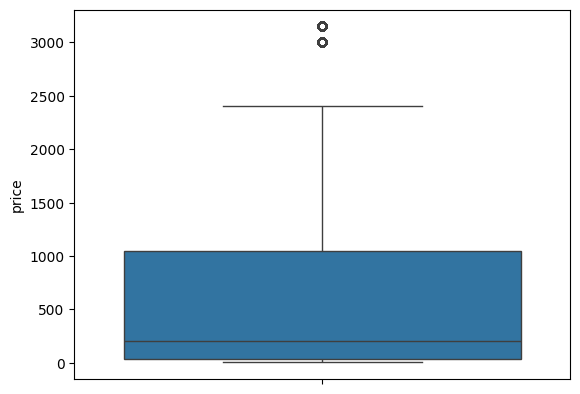

In [24]:
sns.boxplot(new_data['price'])

In [26]:
#Capping Outliers
new_data= data.copy()
new_data.loc[new_data['price']>top, 'price'] = top
new_data.loc[new_data['price']<bot, 'price'] = bot

<Axes: ylabel='price'>

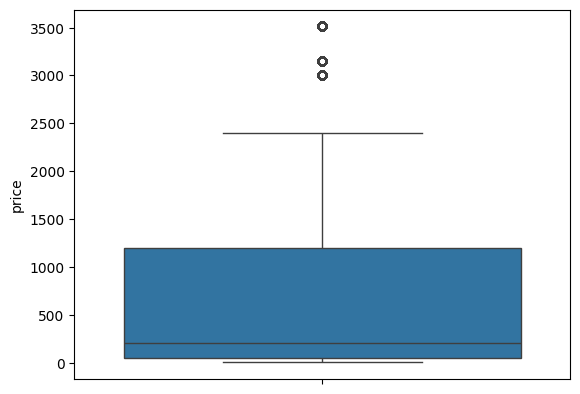

In [27]:
sns.boxplot(new_data['price'])

In [28]:
len(new_data)

99457

**IQR METHOD**

In [29]:
#define the quantile
Q1 = data['price'].quantile(.25)
Q3 = data['price'].quantile(.75)
IQR = Q3 - Q1

In [31]:
#Quantile area
Q1, Q3, IQR

(45.45, 1200.32, 1154.87)

In [32]:
#define the limit
top = Q3 + (1.5*IQR)
bot = Q1 - (1.5*IQR)
bot, top

(-1686.8549999999998, 2932.625)

<Axes: ylabel='price'>

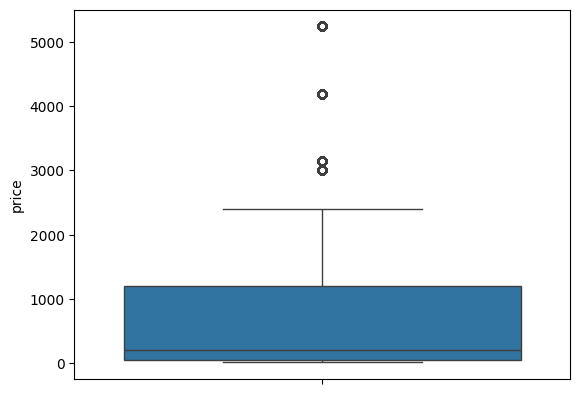

In [33]:
sns.boxplot(data['price'])

In [34]:
#define the outliers
data.loc[(data['price']> top) | (data['price'] < bot) ]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
15,I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,7/11/2021,Viaport Outlet
23,I252275,C313348,Male,44,Technology,5,5250.00,Cash,26/10/2021,Kanyon
53,I160777,C626042,Female,43,Technology,4,4200.00,Cash,22/02/2022,Metrocity
69,I883721,C236859,Female,44,Technology,5,5250.00,Credit Card,19/11/2021,Mall of Istanbul
...,...,...,...,...,...,...,...,...,...,...
99332,I206967,C232954,Female,53,Shoes,5,3000.85,Credit Card,13/03/2022,Metrocity
99374,I221532,C956894,Male,36,Technology,3,3150.00,Credit Card,24/12/2021,Metropol AVM
99387,I429361,C258359,Male,33,Technology,3,3150.00,Credit Card,1/8/2022,Kanyon
99424,I549710,C541824,Female,34,Technology,3,3150.00,Cash,13/01/2021,Metrocity


In [35]:
#trimming outliers
new_data= data.loc[(data['price']< top) & (data['price'] > bot) ]
print('Before Trimming:', len(data))
print('After Trimming:', len(new_data))
print('Outliers that removed:', len(data)-len(new_data))

Before Trimming: 99457
After Trimming: 94433
Outliers that removed: 5024


<Axes: ylabel='price'>

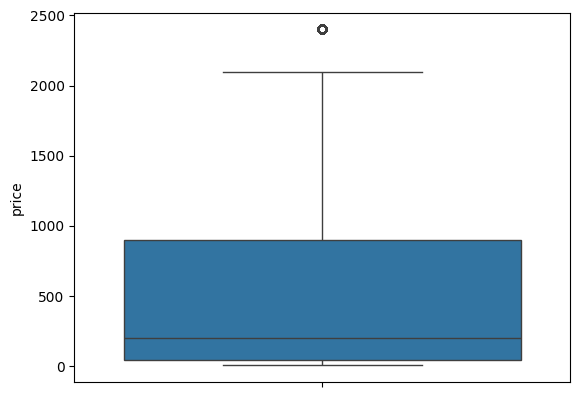

In [36]:
sns.boxplot(new_data['price'])

In [37]:
#Capping Outliers
new_data= data.copy()
new_data.loc[new_data['price']>top, 'price'] = top
new_data.loc[new_data['price']<bot, 'price'] = bot

<Axes: ylabel='price'>

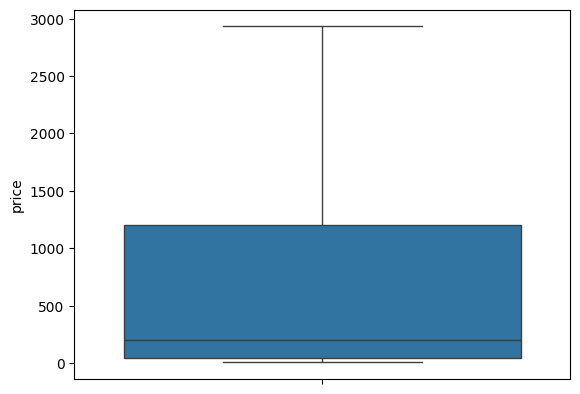

In [38]:
sns.boxplot(new_data['price'])

In [ ]:
#Conclusion
#For this size of datasets, the IQR Method with Capping the Outliers showing a better result to handle the outliers.
#Z score might be a good way to handle the outlier if the data are normally distributed and/or smaller size.